In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
import os
os.listdir()

['.git', '.gitignore', '.ipynb_checkpoints', 'data', 'FFT.ipynb', 'README.md']

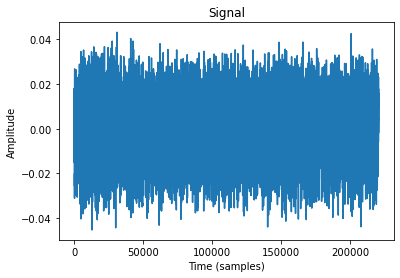

In [78]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
abnormal_y, abnormal_sr = librosa.load('data/fan/id_00/abnormal/00000000.wav')
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');



In [107]:
normal_y, normal_sr = librosa.load('data/fan/id_00/normal/00000000.wav')
y = [*normal_y,*abnormal_y]
df = pd.DataFrame(y,columns=['amplitude'])
df['target'] = [0]*len(y)
df.loc[:(len(y)/2)-1,'target']='normal'
df.loc[len(y)/2:len(y)-1,'target']='abnormal'
df['target'].value_counts()


normal      220500
abnormal    220500
Name: target, dtype: int64

array([[0.19928624],
       [0.06276487],
       [0.45588827],
       ...,
       [0.00401097],
       [0.00401087],
       [0.00401083]], dtype=float32)

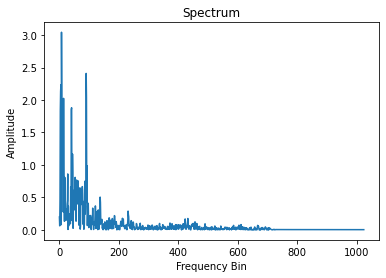

In [50]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
ft

array([-0.01110327, -0.01455556, -0.01233269, ...,  0.01123148,
        0.0137985 ,  0.00964135], dtype=float32)

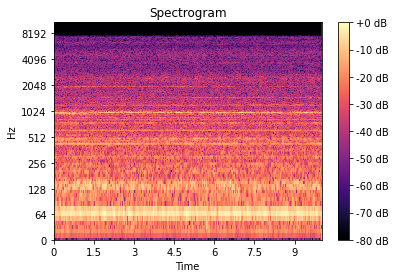

In [18]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

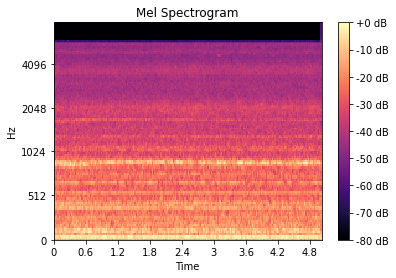

In [19]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [23]:
df = pd.DataFrame(y,columns=['amplitude'])

In [24]:
df['target'] = np.where(df['amplitude']<1.0 ,"normal", "abnormal")


In [29]:
df.loc[df['amplitude']>1.0]

,amplitude,target


In [60]:
print(df['amplitude'].quantile([.1, .2, .3]))

0.1   -0.015784
0.2   -0.010246
0.3   -0.006215
Name: amplitude, dtype: float64


In [72]:
for x in range(50):
    print(df['amplitude'].quantile([x/50]))


0.0   -0.045319
Name: amplitude, dtype: float64
0.02   -0.024845
Name: amplitude, dtype: float64
0.04   -0.021432
Name: amplitude, dtype: float64
0.06   -0.019147
Name: amplitude, dtype: float64
0.08   -0.017322
Name: amplitude, dtype: float64
0.1   -0.015784
Name: amplitude, dtype: float64
0.12   -0.014429
Name: amplitude, dtype: float64
0.14   -0.013258
Name: amplitude, dtype: float64
0.16   -0.01219
Name: amplitude, dtype: float64
0.18   -0.011161
Name: amplitude, dtype: float64
0.2   -0.010246
Name: amplitude, dtype: float64
0.22   -0.009361
Name: amplitude, dtype: float64
0.24   -0.008515
Name: amplitude, dtype: float64
0.26   -0.007728
Name: amplitude, dtype: float64
0.28   -0.006953
Name: amplitude, dtype: float64
0.3   -0.006215
Name: amplitude, dtype: float64
0.32   -0.005466
Name: amplitude, dtype: float64
0.34   -0.004742
Name: amplitude, dtype: float64
0.36   -0.004058
Name: amplitude, dtype: float64
0.38   -0.003376
Name: amplitude, dtype: float64
0.4   -0.002712
Name: amp